In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense,Activation

In [2]:
df = pd.read_csv('/content/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
# Perform data pre-processing 
df.isnull().any() 
df.isnull().sum() 
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


In [4]:
df.describe(include = 'all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [5]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<Axes: >

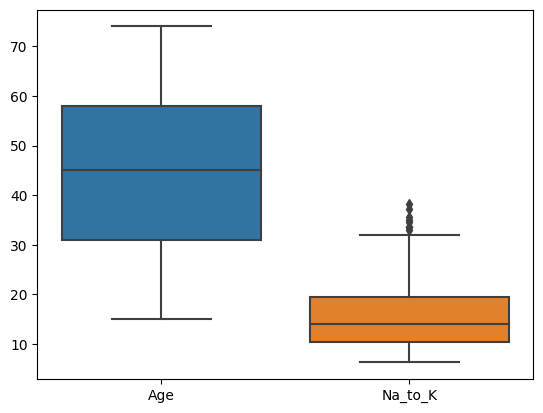

In [6]:
#box plot
sns.boxplot(df)


<Axes: >

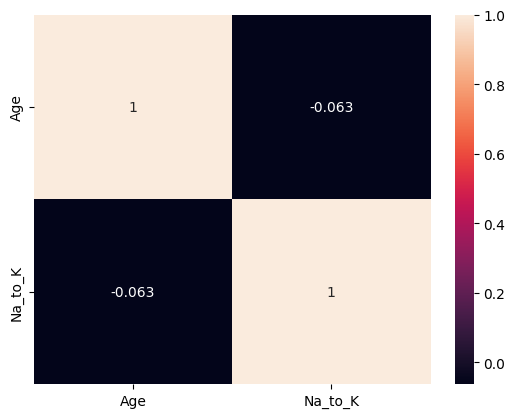

In [7]:
#heat map
sns.heatmap(df.corr(),annot = True)

<Axes: >

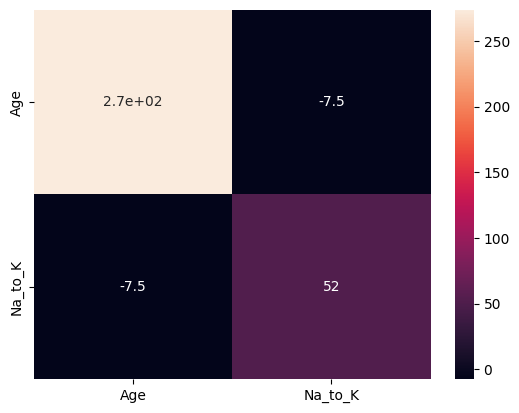

In [8]:
sns.heatmap(df.cov(),annot=True)

<Axes: xlabel='Na_to_K', ylabel='Density'>

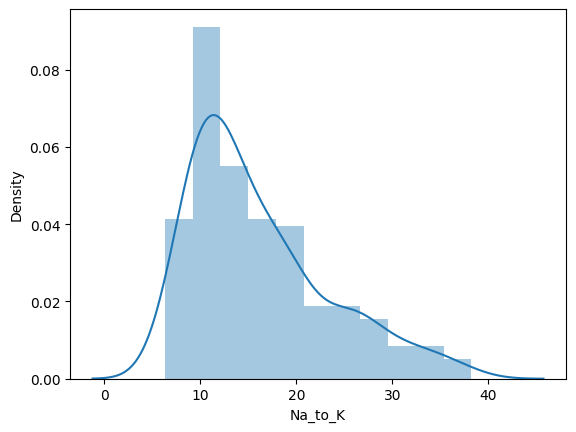

In [9]:
sns.distplot(df['Na_to_K'])

<Axes: xlabel='Age', ylabel='Na_to_K'>

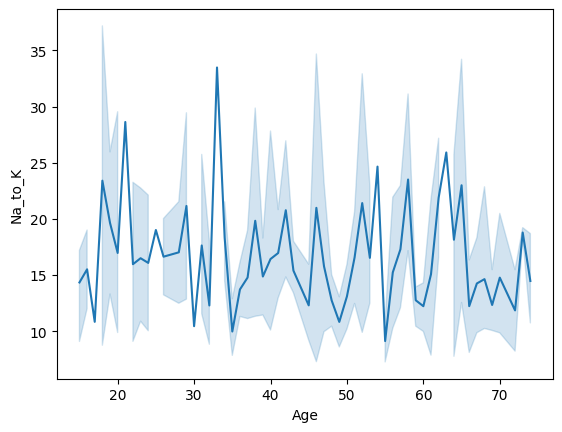

In [10]:
#line plot
sns.lineplot(x = df['Age'],y = df['Na_to_K'])

In [11]:
# Encode categorical variables
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP']) 
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])

# Normalize numerical variables
scaler = preprocessing.StandardScaler()
df[['Age', 'Na_to_K']] = scaler.fit_transform(df[['Age', 'Na_to_K']])

# Split the data into features and labels 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
y = pd.get_dummies(df.iloc[:,5:]).values 
print(df['Drug'].unique())

['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print(X)
print(y)

          Age  Sex  BP  Cholesterol   Na_to_K
0   -1.291591    0   0            0  1.286522
1    0.162699    1   1            0 -0.415145
2    0.162699    1   1            0 -0.828558
3   -0.988614    0   2            0 -1.149963
4    1.011034    0   1            0  0.271794
..        ...  ...  ..          ...       ...
195  0.708057    0   1            0 -0.626917
196 -1.715759    1   1            0 -0.565995
197  0.465676    1   2            0 -0.859089
198 -1.291591    1   2            1 -0.286500
199 -0.261469    0   1            1 -0.657170

[200 rows x 5 columns]
[[0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 

In [13]:
X.shape,y.shape

((200, 5), (200, 5))

In [14]:
#Task 2: Build the ANN Model
# Build the ANN model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X.shape[1])) # Input layer 
model.add(Dense(16, activation='relu')) # Hidden layer 1 
model.add(Dense(8, activation='relu')) # Hidden layer 2
model.add(Dense(4, activation='relu')) # Hidden layer 3 
model.add(Dense(5, activation='softmax')) # Output layer

In [15]:
# Compile the model 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 5)                 25        
                                                                 
Total params: 917
Trainable params: 917
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=5, validation_data=(X_test, y_test))

Epoch 1/10
32/32 [==============================] - 2s 11ms/step - loss: 1.5467 - accuracy: 0.4750 - val_loss: 1.5311 - val_accuracy: 0.3750
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 1.4420 - accuracy: 0.4750 - val_loss: 1.4199 - val_accuracy: 0.3750
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 1.2562 - accuracy: 0.5063 - val_loss: 1.2207 - val_accuracy: 0.5250
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 1.0540 - accuracy: 0.6187 - val_loss: 1.0803 - val_accuracy: 0.5250
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.9065 - accuracy: 0.6875 - val_loss: 0.9647 - val_accuracy: 0.5750
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7922 - accuracy: 0.7063 - val_loss: 0.8454 - val_accuracy: 0.6250
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7148 - accuracy: 0.7125 - val_loss: 0.8035 - val_accuracy: 0.6000
Epoch 8/10
32/32 [=

In [18]:
ypred = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step
